<a href="https://colab.research.google.com/github/anjha1/GLA-4-Years/blob/main/2%20nd%20year/2.Machine%20Learning/Gender%20Classification%20using%20Logistic%20Regression%20in%20Python/Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gender-classification-dataset/gender_classification_v7.csv


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data=pd.read_csv("/kaggle/input/gender-classification-dataset/gender_classification_v7.csv")

In [ ]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [ ]:
data.tail()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [ ]:
data.corr()

ValueError: could not convert string to float: 'Male'

In [ ]:
data.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [ ]:
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
data['gender']=data['gender'].map({'Male':1,'Female':2})

In [ ]:
data.corr()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
long_hair,1.000000,-0.006530,-0.017233,0.001216,0.014432,0.011287,-0.025794,0.010767
forehead_width_cm,-0.006530,1.000000,0.088596,0.251648,0.257368,0.258564,0.251328,-0.334125
forehead_height_cm,-0.017233,0.088596,1.000000,0.211655,0.194120,0.205441,0.215292,-0.277190
nose_wide,0.001216,0.251648,0.211655,1.000000,0.565192,0.557615,0.569303,-0.758502
nose_long,0.014432,0.257368,0.194120,0.565192,1.000000,0.561229,0.559794,-0.744147
lips_thin,0.011287,0.258564,0.205441,0.557615,0.561229,1.000000,0.565312,-0.743319
distance_nose_to_lip_long,-0.025794,0.251328,0.215292,0.569303,0.559794,0.565312,1.000000,-0.754850
gender,0.010767,-0.334125,-0.277190,-0.758502,-0.744147,-0.743319,-0.754850,1.000000


In [ ]:
data.head()

In [ ]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.00000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900,1.50010
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049,0.50005
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000,1.00000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000,2.00000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000,2.00000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000,2.00000


In [ ]:
data.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [ ]:
data.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

<Axes: >

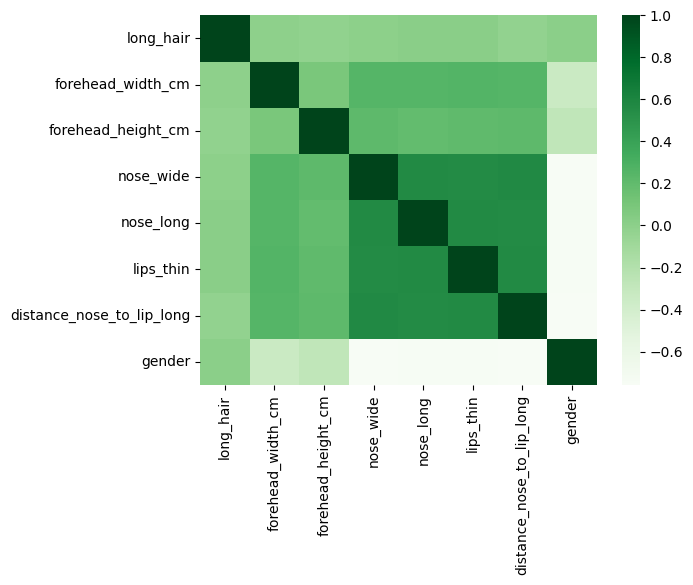

In [ ]:
import seaborn as sns
sns.heatmap(data.corr(),cmap="Greens")

In [ ]:
data.columns

<Axes: >

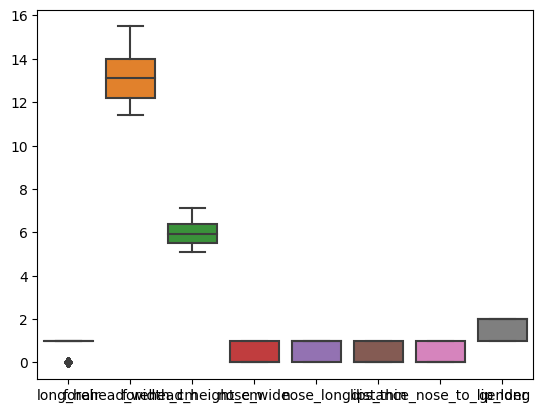

In [ ]:
sns.boxplot(data)

In [ ]:
y=data['gender']

In [ ]:
data.drop('gender',axis=1,inplace=True)

In [ ]:
x=data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [ ]:
print("Accuracy: ",accuracy_score(Y_test,y_pred))

Accuracy:  0.9600399600399601


In [ ]:
confusion_matrix(Y_test,y_pred)

array([[476,  23],
       [ 17, 485]])

In [ ]:
precision_score(Y_test,y_pred)

0.9655172413793104

In [ ]:
recall_score(Y_test,y_pred)

0.9539078156312625

In [ ]:
f1_score(Y_test,y_pred)

0.9596774193548386